# **1. Import the Necessary Libraries**

In [ ]:
# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/accepted_2007_to_2018Q4.csv')

# **Understand The data**

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045375 entries, 0 to 2260698
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   term                 object 
 2   int_rate             float64
 3   installment          float64
 4   grade                object 
 5   sub_grade            object 
 6   emp_length           object 
 7   home_ownership       object 
 8   issue_d              object 
 9   verification_status  object 
 10  purpose              object 
 11  dti                  float64
 12  delinq_2yrs          float64
 13  loan_status          object 
 14  zip_code             object 
 15  avg_cur_bal          float64
 16  revol_bal            float64
dtypes: float64(7), object(10)
memory usage: 280.9+ MB


# **2. Data Cleaning**

First Identify the percentage of null values in each column in order to drop certain columns that don't meet a percentage threshold.

In [ ]:
#Find the counts and percentage of the missing values
df_na = pd.DataFrame({'Percent': 100*df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0]

,Percent,Count
member_id,100.00000,2260701
loan_amnt,0.00146,33
funded_amnt,0.00146,33
funded_amnt_inv,0.00146,33
term,0.00146,33
...,...,...
settlement_status,98.48516,2226455
settlement_date,98.48516,2226455
settlement_amount,98.48516,2226455
settlement_percentage,98.48516,2226455


# **Create a new Dataframe with 88% value Retention**

In [ ]:
# Create a new dataframe with 88% retention value
df = df.dropna(axis=1, thresh=int(0.75*len(df)))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,...,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,...,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,...,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,...,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,...,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [ ]:
# Get null values for each column
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))


id : 0
loan_amnt : 33
funded_amnt : 33
funded_amnt_inv : 33
term : 33
int_rate : 33
installment : 33
grade : 33
sub_grade : 33
emp_title : 167002
emp_length : 146940
home_ownership : 33
annual_inc : 37
verification_status : 33
issue_d : 33
loan_status : 33
pymnt_plan : 33
url : 33
purpose : 33
title : 23358
zip_code : 34
addr_state : 33
dti : 1744
delinq_2yrs : 62
earliest_cr_line : 62
fico_range_low : 33
fico_range_high : 33
inq_last_6mths : 63
open_acc : 62
pub_rec : 62
revol_bal : 33
revol_util : 1835
total_acc : 62
initial_list_status : 33
out_prncp : 33
out_prncp_inv : 33
total_pymnt : 33
total_pymnt_inv : 33
total_rec_prncp : 33
total_rec_int : 33
total_rec_late_fee : 33
recoveries : 33
collection_recovery_fee : 33
last_pymnt_d : 2460
last_pymnt_amnt : 33
last_credit_pull_d : 105
last_fico_range_high : 33
last_fico_range_low : 33
collections_12_mths_ex_med : 178
policy_code : 33
application_type : 33
acc_now_delinq : 62
tot_coll_amt : 70309
tot_cur_bal : 70309
total_rev_hi_lim : 

In [ ]:
# Create a new Dataframe that includes valuable columns for prediction
df = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan'
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 
                'avg_cur_bal', 'revol_bal'])
df.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
issue_d                 object
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
zip_code                object
avg_cur_bal            float64
revol_bal              float64
dtype: object

In [ ]:
# Remove string characters in 'term' column
df['term'] = df['term'].astype(str).str.replace('\D+', '')

In [ ]:
df['term'].value_counts()

36    1609754
60     650914
           33
Name: term, dtype: int64

In [ ]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [ ]:
df['emp_length'].value_counts()

10    748005
1     338391
2     203677
3     180753
5     139698
4     136605
6     102628
7      92695
8      91914
9      79395
Name: emp_length, dtype: int64

In [ ]:
# Remove string characters in the'zip code ' column
df['zip_code'] = df['zip_code'].str.replace(r'\D', '')

In [ ]:
df['zip_code'].value_counts()

112    23908
945    23782
750    23649
606    21192
300    20497
       ...  
269        1
568        1
817        1
202        1
896        1
Name: zip_code, Length: 956, dtype: int64

In [ ]:
# Drop the null rows since we have sufficient amount of Data
df = df.dropna(axis=0)

In [ ]:
# Check for null values
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 0
home_ownership : 0
issue_d : 0
verification_status : 0
purpose : 0
dti : 0
delinq_2yrs : 0
loan_status : 0
zip_code : 0
avg_cur_bal : 0
revol_bal : 0


In [ ]:
# Create a new dataframe for exploration and drop a few unnecessary columns 
df_eda = df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)
df_eda.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,purpose,dti,loan_status,zip_code,avg_cur_bal,revol_bal
0,3600.0,36,13.99,123.03,C,C4,10,MORTGAGE,debt_consolidation,5.91,Fully Paid,190,20701.0,2765.0
1,24700.0,36,11.99,820.28,C,C1,10,MORTGAGE,small_business,16.06,Fully Paid,577,9733.0,21470.0
2,20000.0,60,10.78,432.66,B,B4,10,MORTGAGE,home_improvement,10.78,Fully Paid,605,31617.0,7869.0
3,35000.0,60,14.85,829.90,C,C5,10,MORTGAGE,debt_consolidation,17.06,Current,076,23192.0,7802.0
4,10400.0,60,22.45,289.91,F,F1,3,MORTGAGE,major_purchase,25.37,Fully Paid,174,27644.0,21929.0


In [ ]:
# Copy this dataframe to be used later
df_eda_copy = df_eda.copy()

In [ ]:
# Final check after cleaning the Data
df.shape

(2045375, 17)

In [ ]:
# Final Check after cleaning the Data
df.info

<bound method DataFrame.info of          loan_amnt term  int_rate  ...  zip_code avg_cur_bal revol_bal
0           3600.0   36     13.99  ...       190     20701.0    2765.0
1          24700.0   36     11.99  ...       577      9733.0   21470.0
2          20000.0   60     10.78  ...       605     31617.0    7869.0
3          35000.0   60     14.85  ...       076     23192.0    7802.0
4          10400.0   60     22.45  ...       174     27644.0   21929.0
...            ...  ...       ...  ...       ...         ...       ...
2260694    24000.0   60     12.79  ...       356     26106.0   49431.0
2260695    24000.0   60     10.49  ...       840      6369.0   21665.0
2260696    40000.0   60     10.49  ...       907      5680.0    8633.0
2260697    24000.0   60     14.49  ...       334      6243.0   17641.0
2260698    14000.0   60     14.49  ...       770     17883.0    7662.0

[2045375 rows x 17 columns]>

# **Let's Explore the Lending Club(EDA PART)**





Exploratory Data Analysis, or EDA, is an integral part of understanding the LendingClub dataset. Before moving towards classification, it's vital to become familiar with different relationships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding model

# **Loan Distributions**

In [ ]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_vis = df_eda_copy['loan_status'].value_counts()

In [ ]:
pip install jupyterthemes

     |████████████████████████████████| 7.0MB 6.2MB/s 
     |████████████████████████████████| 9.5MB 45.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 430kB 43.2MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.2.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1


Text(0.5, 0, 'Count')

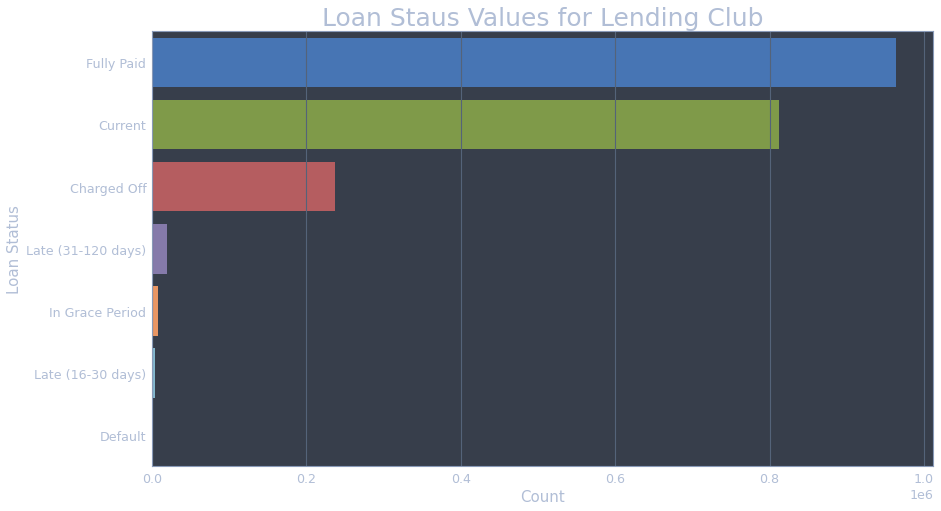

In [ ]:
#Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')



sns.barplot(y = loan_status_vis.index, x = loan_status_vis)
plt.title('Loan Staus Values for Lending Club',fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count',fontsize=15)

In [ ]:
# Set new variable name to include only loans that are defaulted
default_vis = df_eda[df_eda.loan_status == 'Default']

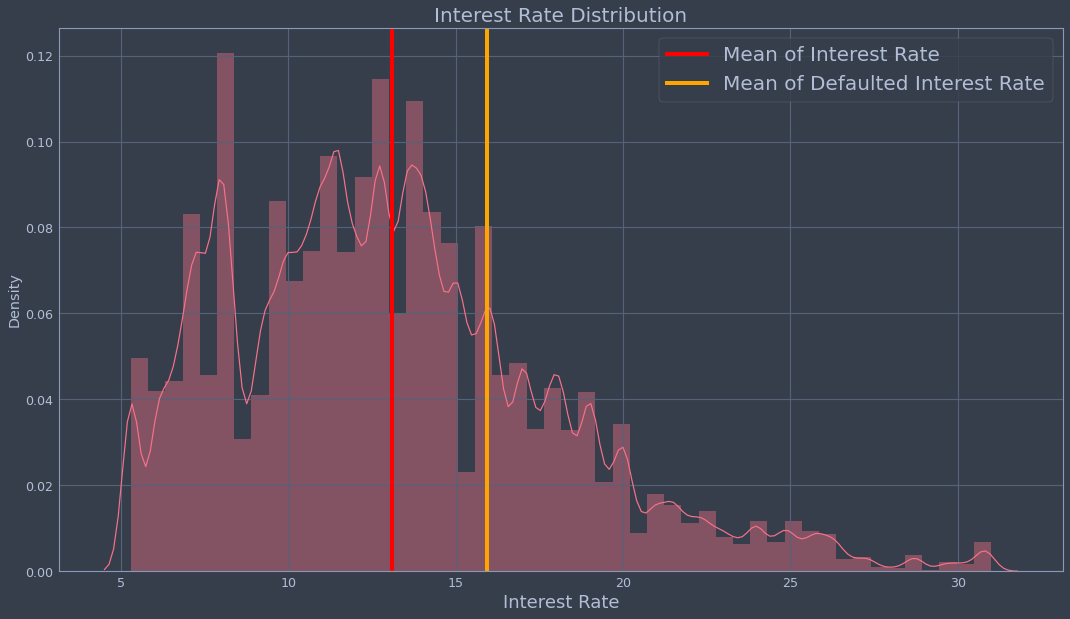

In [ ]:
# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df_eda['int_rate'], hist='density')
plt.axvline(x=df.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
print("The difference in mean between the two interest rates is:", default_vis.int_rate.mean() - df.int_rate.mean())

The difference in mean between the two interest rates is: 2.837865057386505


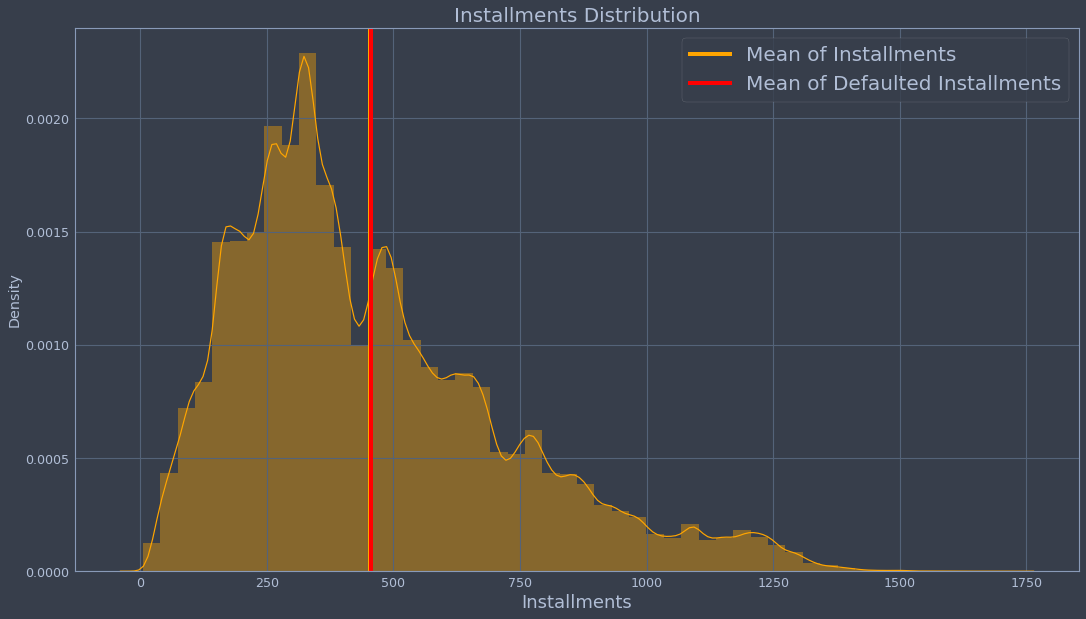

In [ ]:
# Visualize the distribution of the installments
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df_eda['installment'], hist='density', color='orange')
plt.axvline(x=df.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
plt.axvline(x=default_vis.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

# **Loan Grades**

In [ ]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df_eda['grade'].value_counts()

Text(0.5, 0, 'Count')

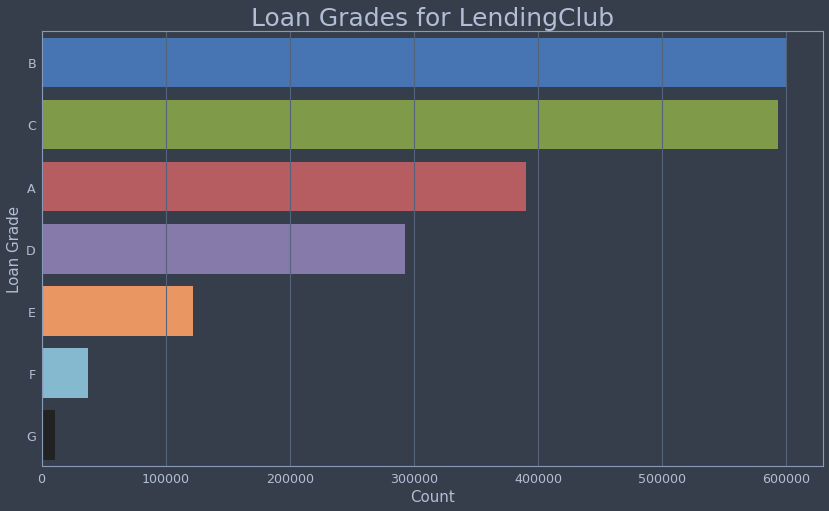

In [ ]:

# Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [ ]:
# Drop values from df that are more than 50,000
avg_cur_bal_vis = df_eda[df_eda.avg_cur_bal < 50000]

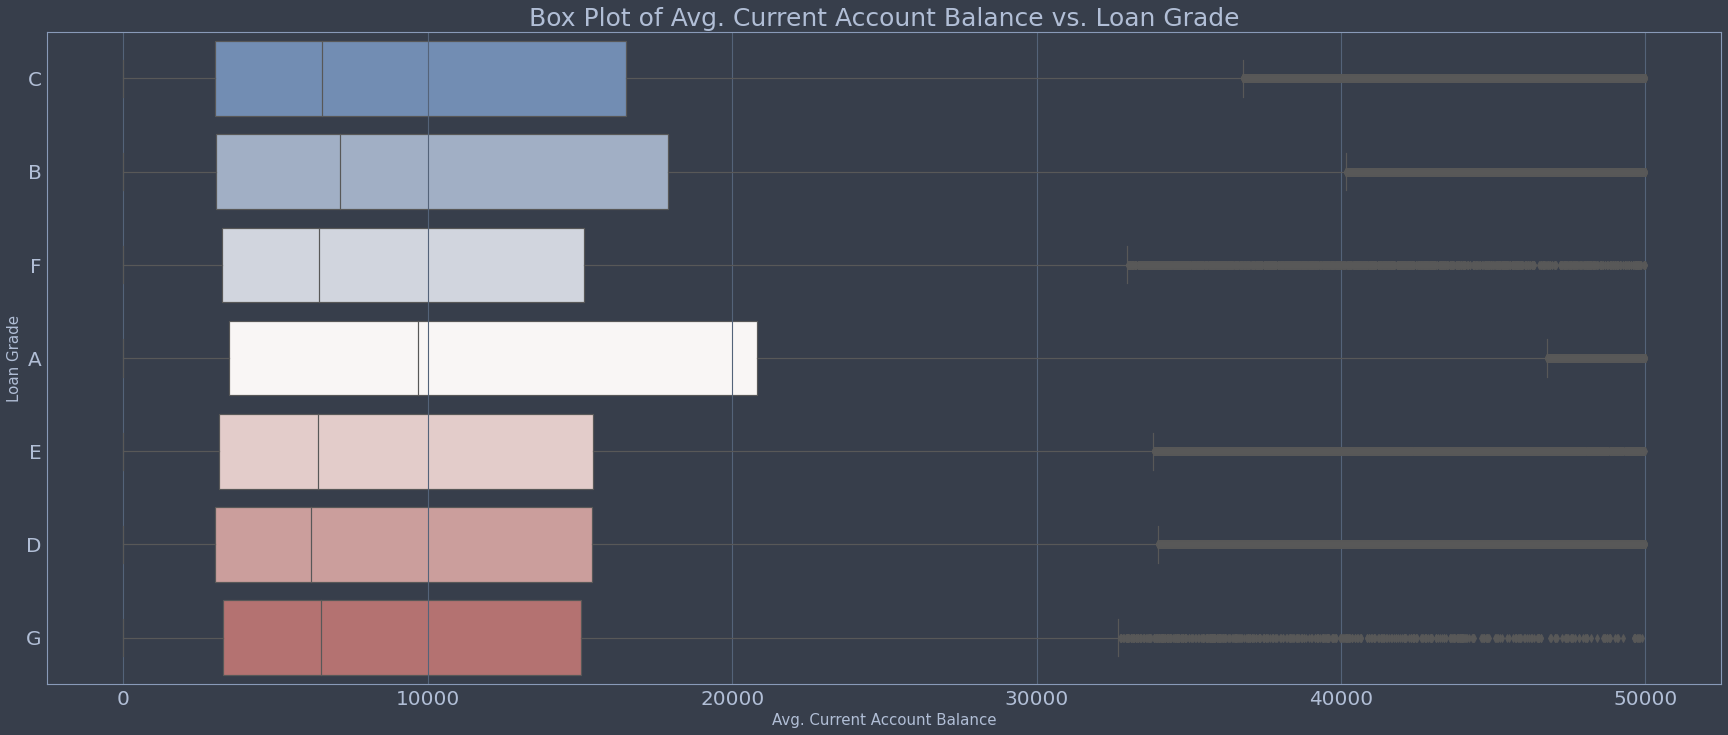

In [ ]:
# Plot the borrower's avg current balance compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="avg_cur_bal", y="grade", data=avg_cur_bal_vis, palette="vlag")
plt.title('Box Plot of Avg. Current Account Balance vs. Loan Grade', fontsize=25)
plt.xlabel('Avg. Current Account Balance', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

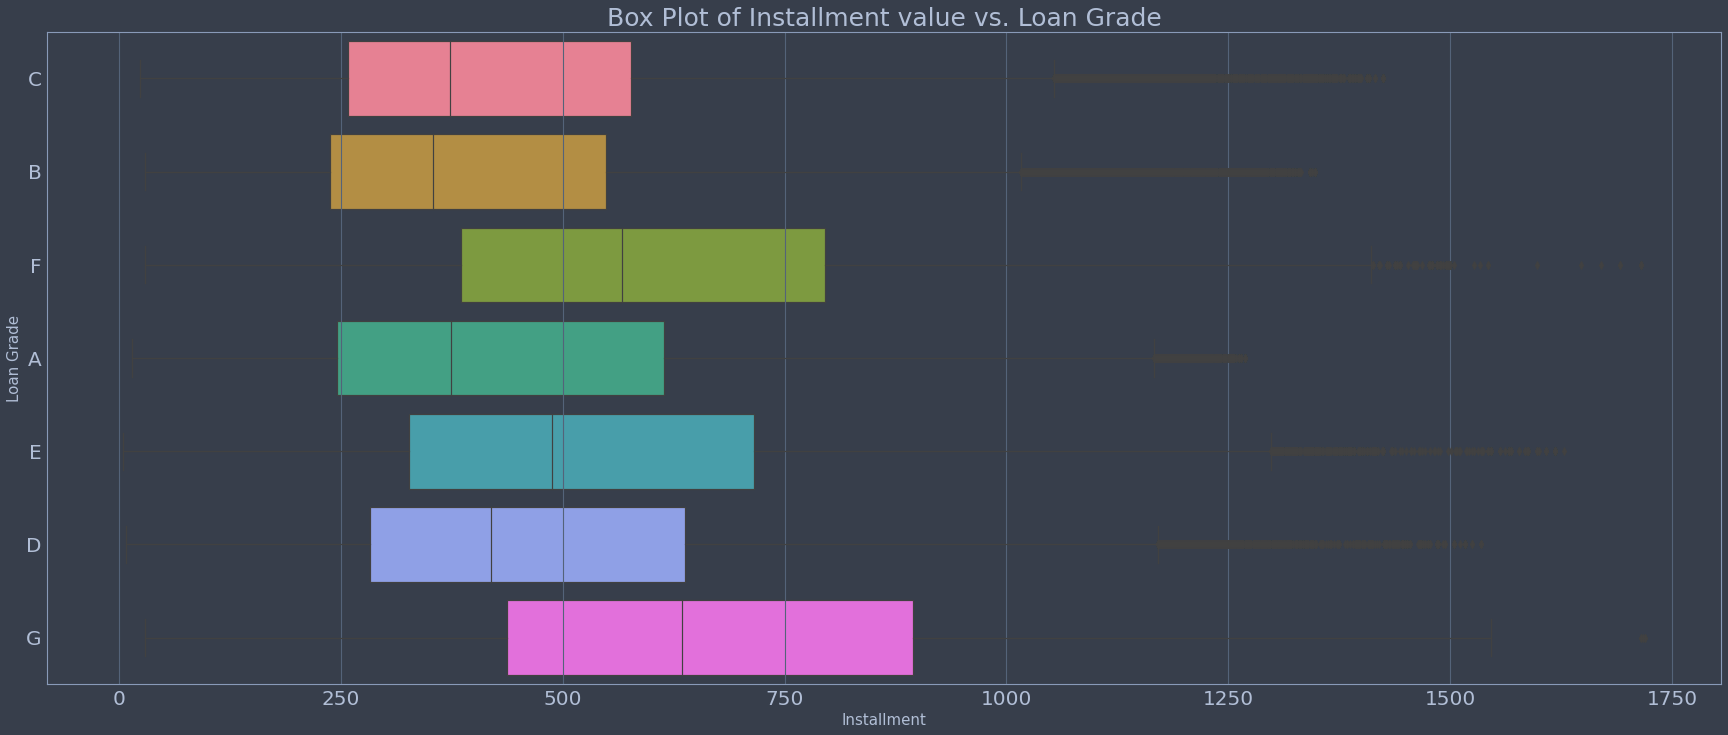

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=df_eda, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

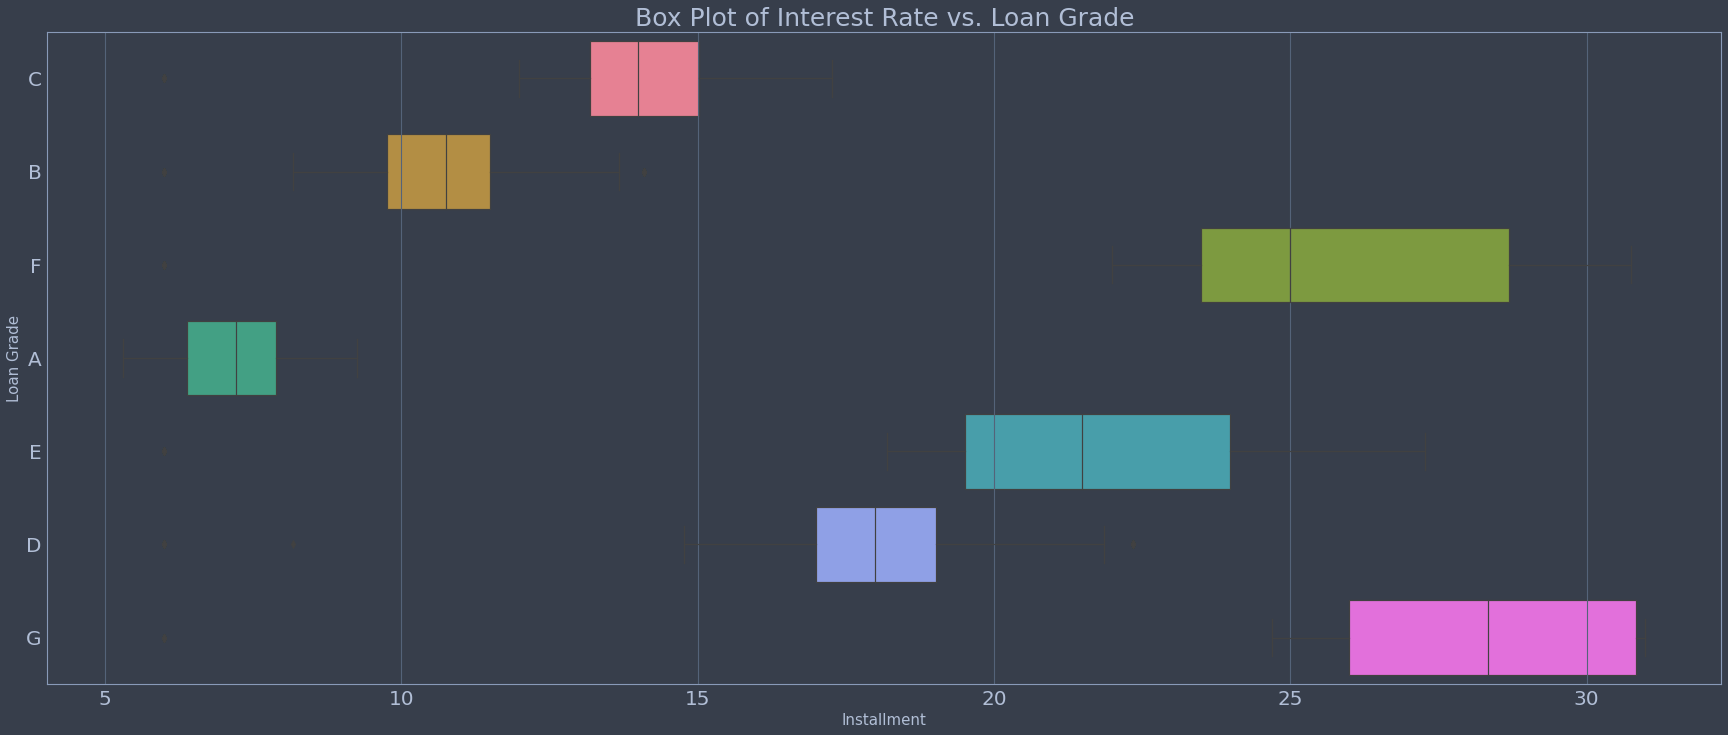

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=df_eda, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

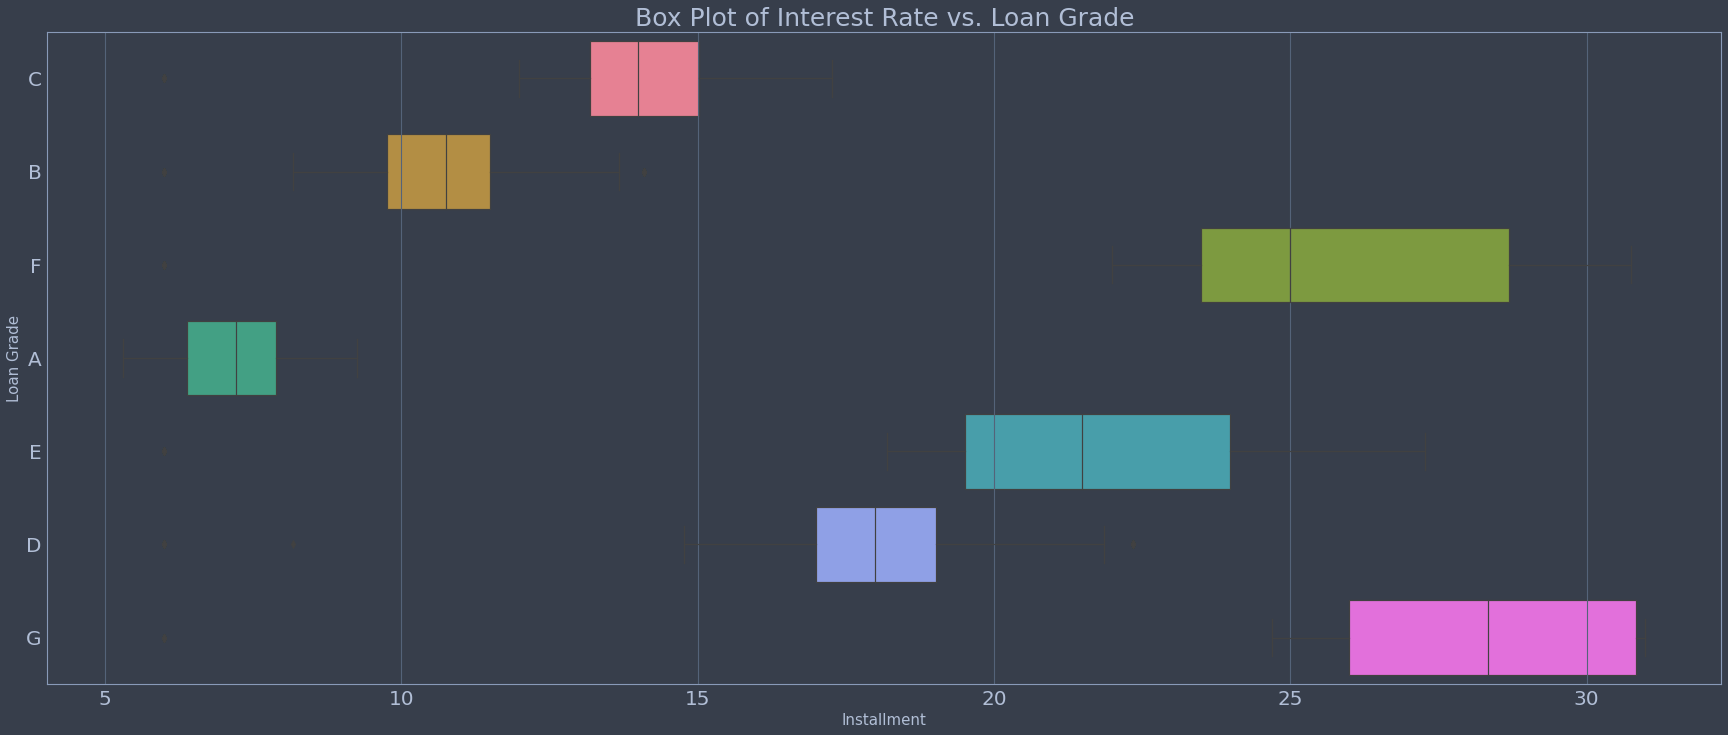

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=df_eda, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# **Other Loan Features**

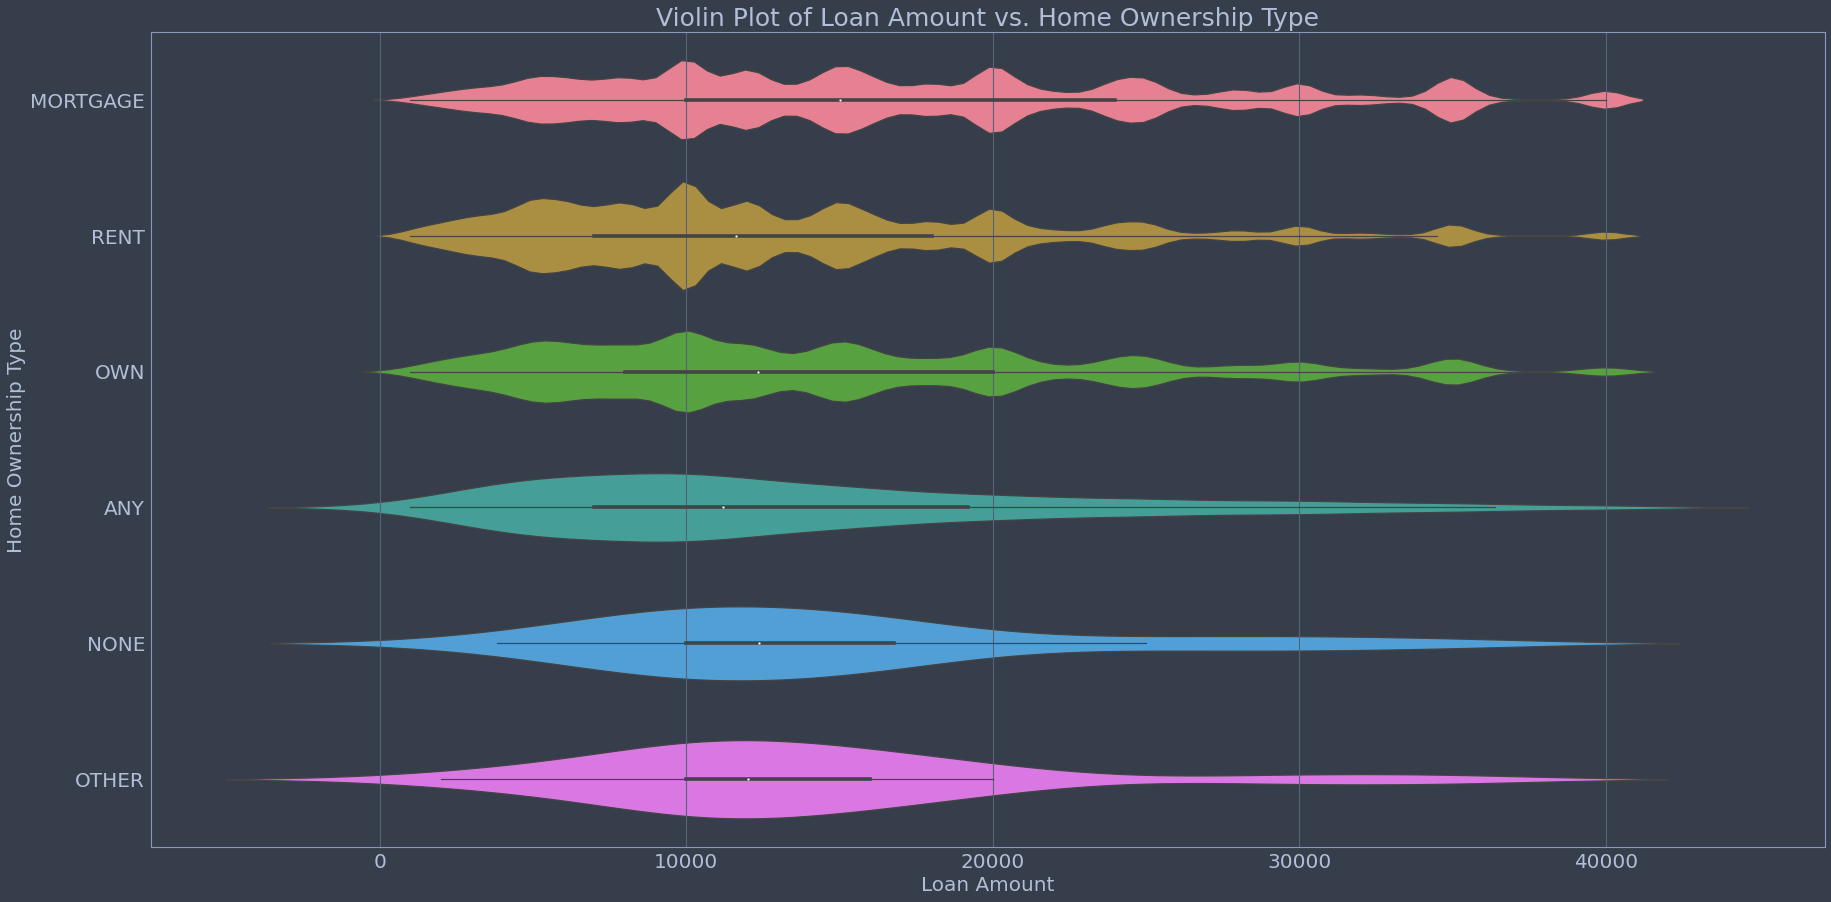

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df_eda, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

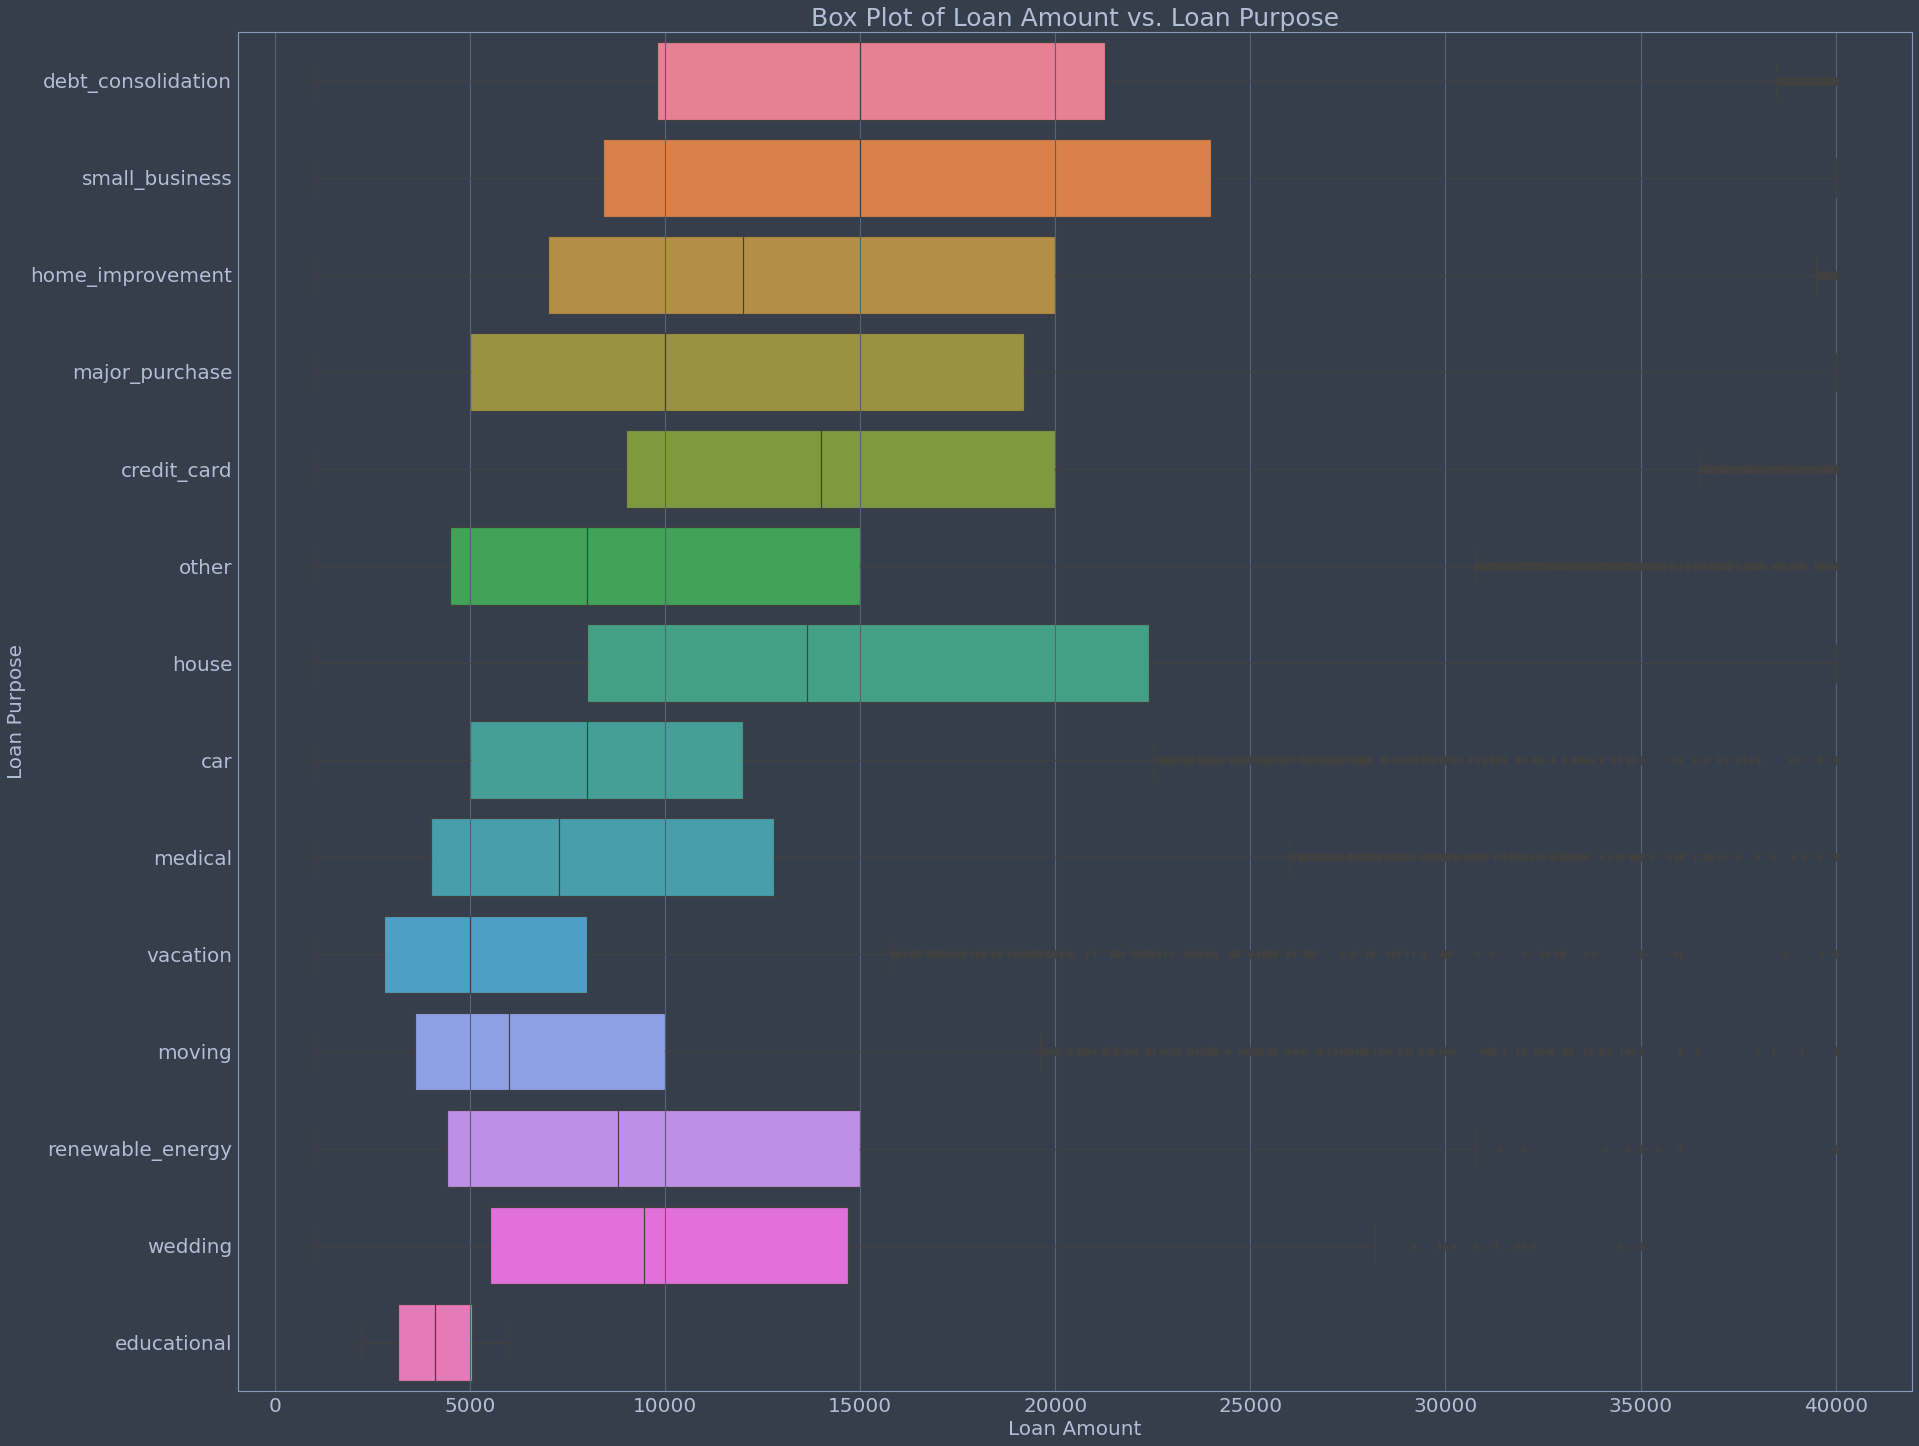

In [ ]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df_eda, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# Drop values from df that more than 100
dti_vis = df_eda[df_eda.dti < 100]

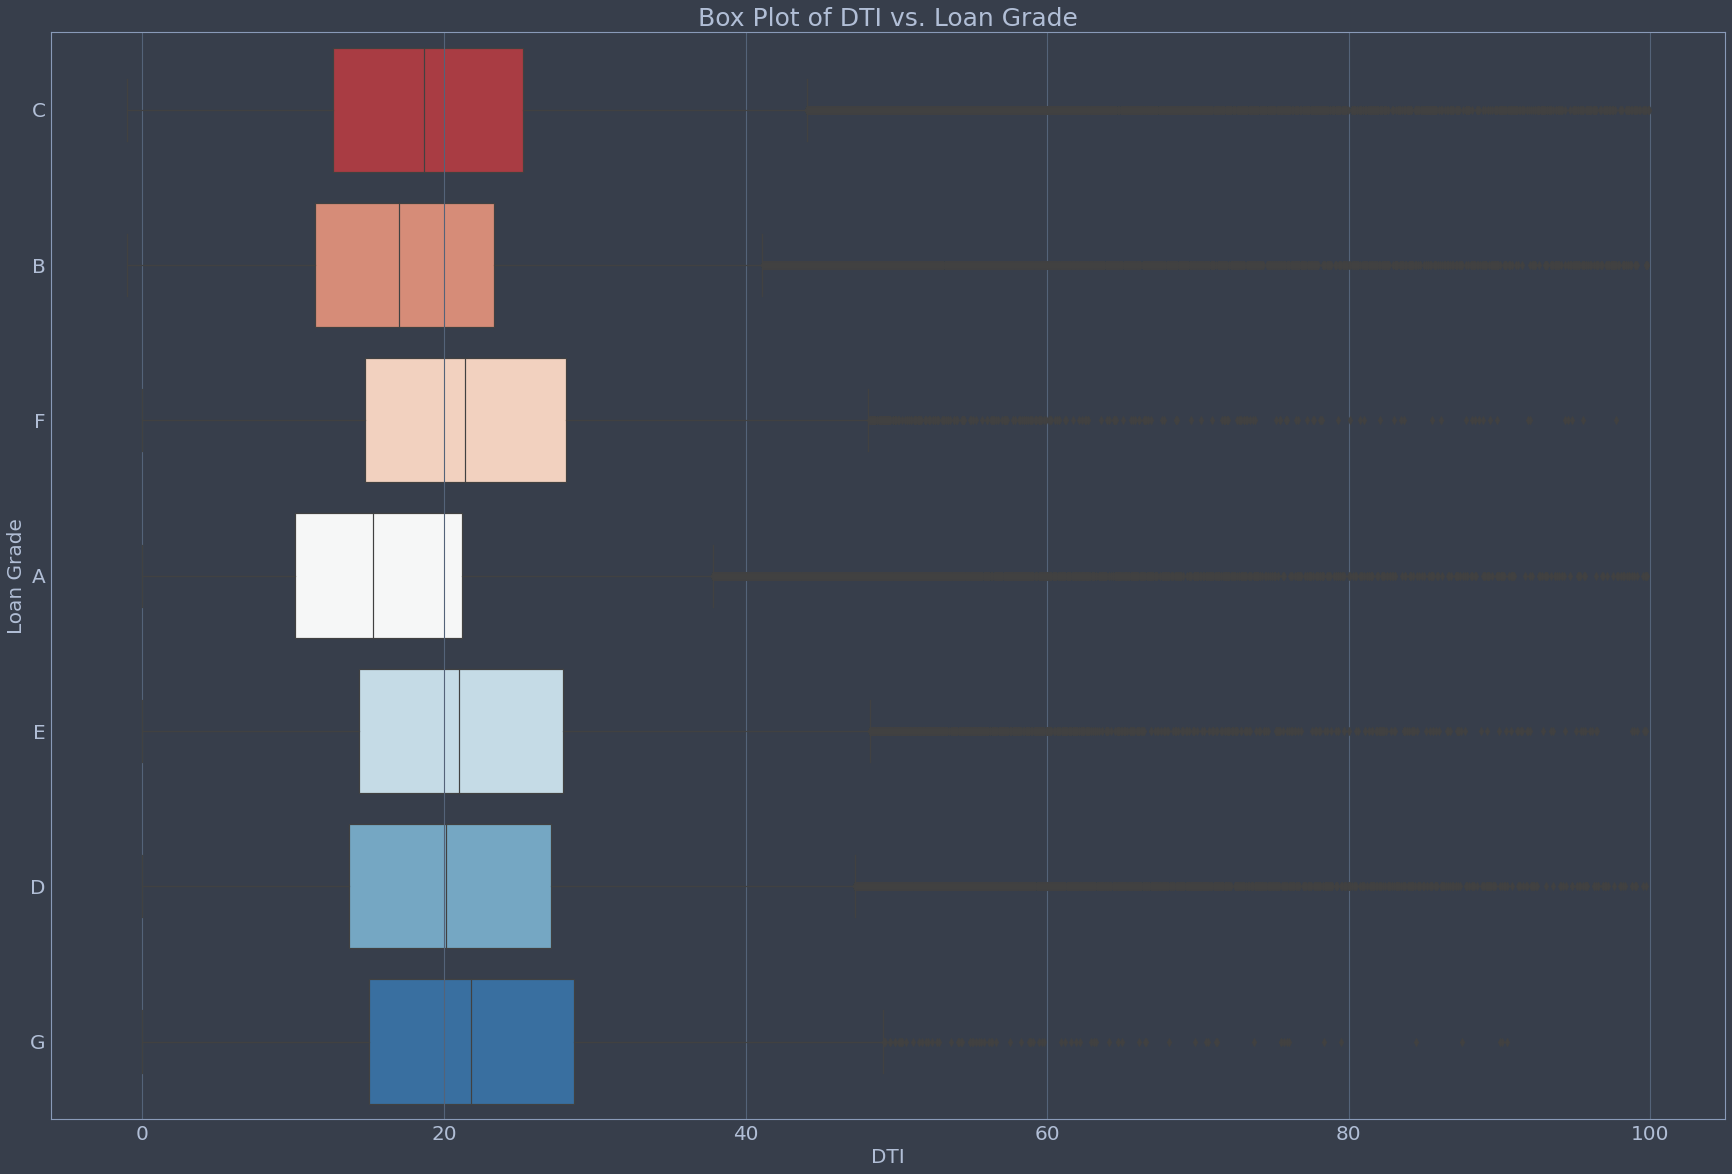

In [ ]:
# Plot the borrower's DTI compared to load grade
plt.figure(figsize=(30,20))
sns.boxplot(x="dti", y="grade", data=dti_vis, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# **Correlation Matrix**

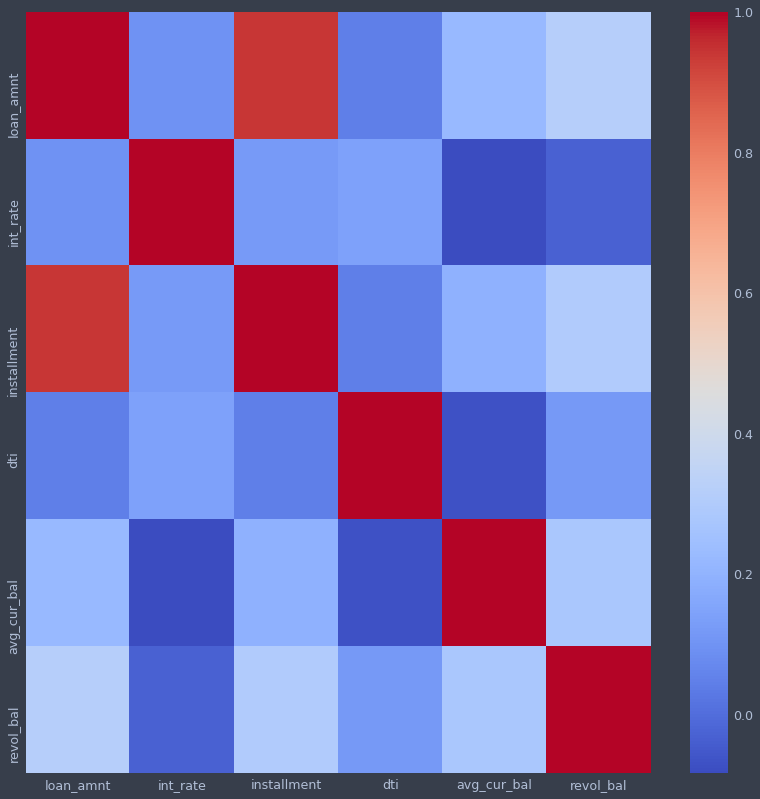

In [ ]:
# Set correlation variable
corr = df_eda.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

# There is a strong correlation between installment values and loan amount. This multicollinearity should be removed in the following model because these two values explain the data in the same manner

# **ML Modeling**

It's vital to first split the data into training and test sets, or perhaps use cross-validation techniques to further segment the dataset into composite sets of training and test sets. Then it's important to implement a choice selection of performance metrics that are tied into the initial problem statement.

# **Model Preparation**